In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as sklm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn import neighbors
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import matplotlib.pylab as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#reading file
nhl = pd.read_csv('NHL.csv', sep=',', encoding='latin-1')
#was receiving an error due to weird characters in the file so I had to specify the encoding to read

In [4]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13056 entries, 0 to 13055
Data columns (total 31 columns):
Rk            13056 non-null int64
Player        13056 non-null object
Age           13056 non-null int64
Pos           13056 non-null object
Tm            13056 non-null object
GP            13056 non-null int64
G             13056 non-null int64
A             13056 non-null int64
PTS           13056 non-null int64
plusminus     13056 non-null int64
PIM           13056 non-null int64
PS            13056 non-null float64
EV            13056 non-null int64
PP            13056 non-null int64
SH            13056 non-null int64
GW            13056 non-null int64
EV.1          13056 non-null int64
PP.1          13056 non-null int64
SH.1          13056 non-null int64
S             13056 non-null int64
S_percent     12955 non-null float64
TOI           13056 non-null int64
ATOI          13056 non-null float64
BLK           13056 non-null int64
HIT           13056 non-null int64
FOW    

In [5]:
nhl.head(11)

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,1733,21.133333,29,34,348,458,43.2,1,1604,2017
1,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,...,1491,19.883333,27,80,842,906,48.2,0,1104,2017
2,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,...,1754,21.400000,15,28,7,44,13.7,0,206,2017
3,4,Nicklas Backstrom\backsni02,29,C,WSH,82,23,63,86,17,...,1497,18.266667,33,45,685,648,51.4,0,60,2017
4,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,...,1438,19.433333,20,30,0,0,0.0,0,119,2017
5,6,Brad Marchand\marchbr03,28,LW,BOS,80,39,46,85,18,...,1555,19.433333,35,51,13,23,36.1,0,184,2017
6,7,Mark Scheifele\scheima01,23,C,WPG,79,32,50,82,18,...,1624,20.566667,34,49,635,826,43.5,0,0,2017
7,8,Leon Draisaitl\draisle01,21,C,EDM,82,29,48,77,7,...,1548,18.883333,36,41,476,496,49.0,0,0,2017
8,9,Brent Burns\burnsbr01,31,D,SJS,82,29,47,76,19,...,2039,0.866667,142,69,0,0,0.0,0,273,2017
9,10,Vladimir Tarasenko\tarasvl01,25,RW,STL,82,39,36,75,-1,...,1515,18.466667,31,50,5,5,50.0,0,0,2017


In [6]:
#nhl.Player = pd.factorize(nhl.Player)[0]
nhl.Pos = pd.factorize(nhl.Pos)[0]
nhl.Tm = pd.factorize(nhl.Tm)[0]
#nhl.ATOI = pd.factorize(nhl.ATOI)[0]
#nhl.Season = pd.factorize(nhl.Season)[0]

In [7]:
nhl.shape

(13056, 31)

In [8]:
nhl = nhl.dropna( how='any')
nhl.shape

(12955, 31)

In [9]:
#first, let us split the dataset to train and test portions. winners = nhl[nhl['HART'] == 1]
ctest =  nhl[nhl['Season'] > 2013]
ctrain = nhl[nhl['Season'] <= 2013]

In [10]:
ctrain.shape

(8641, 31)

In [11]:
ctest.shape

(4314, 31)

In [12]:
ctest.Season

0        2017
1        2017
2        2017
3        2017
4        2017
5        2017
6        2017
7        2017
8        2017
9        2017
10       2017
11       2017
12       2017
13       2017
14       2017
15       2017
16       2017
17       2017
18       2017
19       2017
20       2017
21       2017
22       2017
23       2017
24       2017
25       2017
26       2017
27       2017
28       2017
29       2017
         ... 
10382    2018
10383    2018
10384    2018
10385    2018
10386    2018
10387    2018
10388    2018
10389    2018
10390    2018
10391    2018
10392    2018
10393    2018
10394    2018
10395    2018
10396    2018
10397    2018
10398    2018
10399    2018
10400    2018
10401    2018
10402    2018
10403    2018
10404    2018
10405    2018
10406    2018
10407    2018
10408    2018
10409    2018
10410    2018
10411    2018
Name: Season, Length: 4314, dtype: int64

In [13]:
ctrain.Season

3554     2013
3555     2013
3556     2013
3557     2013
3558     2013
3559     2013
3560     2013
3561     2013
3562     2013
3563     2013
3564     2013
3565     2013
3566     2013
3567     2013
3568     2013
3569     2013
3570     2013
3571     2013
3572     2013
3573     2013
3574     2013
3575     2013
3576     2013
3577     2013
3578     2013
3579     2013
3580     2013
3581     2013
3582     2013
3583     2013
         ... 
13018    2004
13019    2004
13020    2004
13021    2004
13022    2004
13023    2004
13024    2004
13025    2004
13026    2004
13027    2004
13028    2004
13029    2004
13031    2004
13033    2004
13034    2004
13035    2004
13036    2004
13037    2004
13038    2004
13039    2004
13041    2004
13042    2004
13044    2004
13045    2004
13049    2004
13050    2004
13051    2004
13052    2004
13053    2004
13055    2004
Name: Season, Length: 8641, dtype: int64

In [14]:
# the response variable to use for classification: Hart trophy winner 1 or 0? Designating 1 as the response variable
ytest = ctest.HART 
ytrain = ctrain.HART

In [15]:
Xtrain=preprocessing.scale(ctrain.drop(['HART','Votes','Player'], axis=1).astype('float64'))
Xtest=preprocessing.scale(ctest.drop(['HART','Votes','Player'], axis=1).astype('float64'))

In [16]:
lreg=sklm.LogisticRegression()
lreg.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
yhattest1 = lreg.predict(Xtest)
cm = confusion_matrix(ytest, yhattest1)
print("Test Classification accuracy:", lreg.score(Xtest,ytest))
print("\n")
print("Confusion Matrix:\n", cm)
print("\n")
print("Classification Report:\n",classification_report(ytest, yhattest1))

Test Classification accuracy: 0.999072786277


Confusion Matrix:
 [[4310    0]
 [   4    0]]


Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      4310
          1       0.00      0.00      0.00         4

avg / total       1.00      1.00      1.00      4314



C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
lreg.predict(Xtest)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
lreg.predict_proba(Xtest)[0:10]

array([[ 0.81313561,  0.18686439],
       [ 0.96775661,  0.03224339],
       [ 0.97233292,  0.02766708],
       [ 0.97659848,  0.02340152],
       [ 0.95460801,  0.04539199],
       [ 0.87668994,  0.12331006],
       [ 0.98317586,  0.01682414],
       [ 0.98723834,  0.01276166],
       [ 0.97875318,  0.02124682],
       [ 0.9863124 ,  0.0136876 ]])

In [20]:
ypredprob = lreg.predict_proba(Xtest)[:, 1]

In [21]:
ypredprob

array([ 0.18686439,  0.03224339,  0.02766708, ...,  0.00067028,
        0.00184249,  0.00075354])

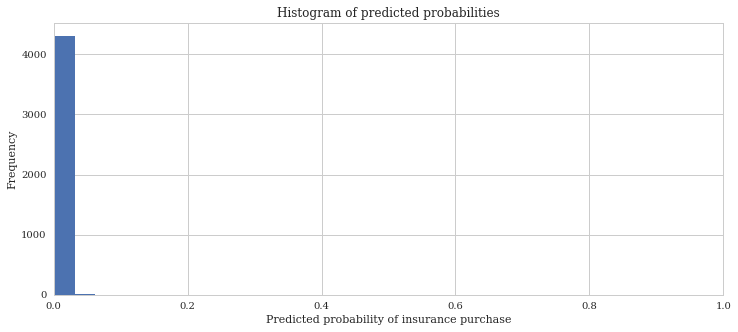

In [22]:
plt.hist(ypredprob, bins=6)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of insurance purchase')
plt.ylabel('Frequency')

In [23]:
ctest['probscore']=ypredprob

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
ctest.head(6)

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season,probscore
0,1,Connor McDavid\mcdavco01,20,0,0,82,30,70,100,27,...,21.133333,29,34,348,458,43.2,1,1604,2017,0.186864
1,2,Sidney Crosby\crosbsi01,29,0,1,75,44,45,89,17,...,19.883333,27,80,842,906,48.2,0,1104,2017,0.032243
2,3,Patrick Kane\kanepa01,28,1,2,82,34,55,89,11,...,21.400000,15,28,7,44,13.7,0,206,2017,0.027667
3,4,Nicklas Backstrom\backsni02,29,0,3,82,23,63,86,17,...,18.266667,33,45,685,648,51.4,0,60,2017,0.023402
4,5,Nikita Kucherov\kucheni01,23,1,4,74,40,45,85,13,...,19.433333,20,30,0,0,0.0,0,119,2017,0.045392
5,6,Brad Marchand\marchbr03,28,2,5,80,39,46,85,18,...,19.433333,35,51,13,23,36.1,0,184,2017,0.123310


In [25]:
#first, let us split the dataset to train and test portions. winners = nhl[nhl['HART'] == 1]
mvps17 =  ctest[(ctest['Season'] == 2017) & (ctest['probscore'] > 0)]
mvps18 = ctest[(ctest['Season'] == 2018) & (ctest['probscore'] > 0)]

In [26]:
print ('The average probability score of 2017 players is: ', mvps17['probscore'].mean(), '.') 
print ('The average probability score of 2018 players is: ', mvps18['probscore'].mean(), '.') 

The average probability score of 2017 players is:  0.0018752516024439871 .
The average probability score of 2018 players is:  0.000965035246428805 .


In [27]:
print(mvps17.shape)
print(mvps18.shape)

(888, 32)
(760, 32)


In [28]:
#reshaping to only players above the mean
mvps17 =  ctest[(ctest['Season'] == 2017) & (ctest['probscore'] > 0.002)]
mvps18 = ctest[(ctest['Season'] == 2018) & (ctest['probscore'] > 0.002)]

In [29]:
print(mvps17.shape)
print(mvps18.shape)

(132, 32)
(40, 32)


In [30]:
mvps17.probscore.describe()

count    132.000000
mean       0.008121
std        0.020052
min        0.002011
25%        0.002332
50%        0.002895
75%        0.006003
max        0.186864
Name: probscore, dtype: float64

In [31]:
mvps18.probscore.describe()

count    40.000000
mean      0.002360
std       0.000308
min       0.002009
25%       0.002146
50%       0.002264
75%       0.002527
max       0.003141
Name: probscore, dtype: float64

In [32]:
mvps17.sort_values(by='probscore', ascending=False, inplace=True)
mvps17.head(20)

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season,probscore
0,1,Connor McDavid\mcdavco01,20,0,0,82,30,70,100,27,...,21.133333,29,34,348,458,43.2,1,1604,2017,0.186864
5,6,Brad Marchand\marchbr03,28,2,5,80,39,46,85,18,...,19.433333,35,51,13,23,36.1,0,184,2017,0.123310
4,5,Nikita Kucherov\kucheni01,23,1,4,74,40,45,85,13,...,19.433333,20,30,0,0,0.0,0,119,2017,0.045392
15,16,Victor Hedman\hedmavi01,26,3,4,79,16,56,72,3,...,0.500000,132,93,0,0,0.0,0,0,2017,0.041760
1,2,Sidney Crosby\crosbsi01,29,0,1,75,44,45,89,17,...,19.883333,27,80,842,906,48.2,0,1104,2017,0.032243
2,3,Patrick Kane\kanepa01,28,1,2,82,34,55,89,11,...,21.400000,15,28,7,44,13.7,0,206,2017,0.027667
3,4,Nicklas Backstrom\backsni02,29,0,3,82,23,63,86,17,...,18.266667,33,45,685,648,51.4,0,60,2017,0.023402
8,9,Brent Burns\burnsbr01,31,3,7,82,29,47,76,19,...,0.866667,142,69,0,0,0.0,0,273,2017,0.021247
13,14,Evgeni Malkin\malkiev01,30,0,1,62,33,39,72,18,...,18.616667,25,40,365,481,43.1,0,0,2017,0.019293
16,17,Erik Karlsson\karlser01,26,3,11,77,17,54,71,10,...,2.833333,201,67,0,0,0.0,0,258,2017,0.018166


In [33]:
mvps18.sort_values(by='probscore', ascending=False, inplace=True)
mvps18.head(15)

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season,probscore
9652,1,Nikita Kucherov\kucheni01,24,1,4,26,19,19,38,8,...,20.800000,4,10,1,0,100.0,0,0,2018,0.003141
9654,3,Johnny Gaudreau\gaudrjo01,24,2,22,26,12,24,36,4,...,18.933333,3,2,1,3,25.0,0,0,2018,0.003136
9749,98,Mikhail Sergachev\sergami01,19,3,4,26,6,12,18,7,...,14.516667,14,27,0,0,0.0,0,0,2018,0.002926
9661,10,Brayden Schenn\schenbr01,26,0,8,27,10,20,30,19,...,19.566667,10,48,208,237,46.7,0,0,2018,0.002871
9655,4,Blake Wheeler\wheelbl01,31,1,6,27,7,28,35,7,...,20.566667,19,24,14,20,41.2,0,0,2018,0.002862
10406,755,Tage Thompson\thompta01,20,0,8,4,0,0,0,-3,...,10.083333,0,5,0,0,0.0,0,0,2018,0.002748
9686,35,Evander Kane\kaneev01,26,2,24,27,12,12,24,-3,...,20.150000,10,51,48,61,44.0,0,0,2018,0.002698
9656,5,Mark Scheifele\scheima01,24,0,6,27,14,20,34,11,...,21.216667,13,26,285,280,50.4,0,0,2018,0.002641
9833,182,Charlie McAvoy\mcavoch01,20,3,5,24,3,11,14,0,...,23.583333,29,62,0,0,0.0,0,0,2018,0.002603
9690,39,John Klingberg\klingjo01,25,3,10,27,4,20,24,3,...,23.516667,40,10,0,0,0.0,0,0,2018,0.002551


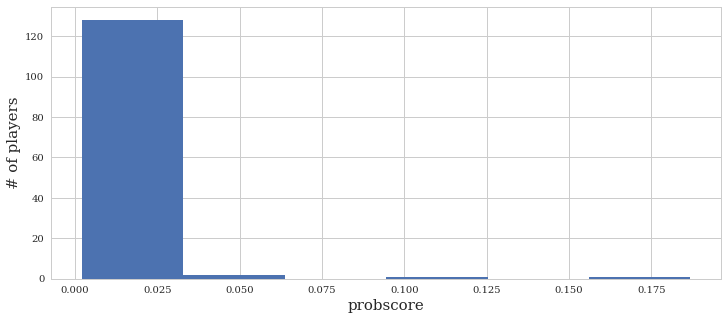

In [34]:
mvps17hist=mvps17['probscore']
mvps17hist.hist(normed=0, histtype='stepfilled', bins=6)

plt.xlabel('probscore',fontsize=15)
plt.ylabel('# of players',fontsize=15)
plt.show()

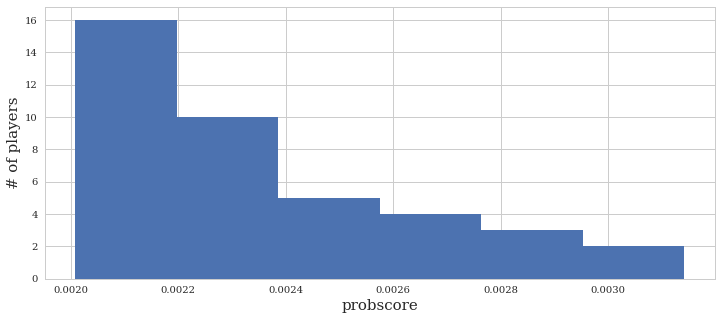

In [35]:
mvps18hist=mvps18['probscore']
mvps18hist.hist(normed=0, histtype='stepfilled', bins=6)

plt.xlabel('probscore',fontsize=15)
plt.ylabel('# of players',fontsize=15)
plt.show()

In [36]:
mvps18hist2 = mvps18[['Player','probscore']]
mvps17hist2 = mvps17[['Player','probscore']]

In [37]:
mvps18hist2.set_index('Player', inplace=True)
mvps17hist2.set_index('Player', inplace=True)

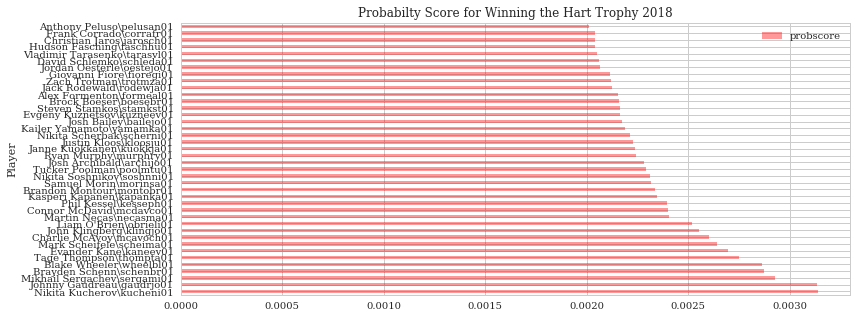

In [38]:
mvps18hist2.plot(kind='barh', color='Red', alpha=0.4, 
              title='Probabilty Score for Winning the Hart Trophy 2018')
plt.savefig('probscore2018.png', dpi=300, bbox_inches='tight')

In [39]:
mvps18hist2 = mvps18hist2[0:10]

In [40]:
mvps18hist2

,probscore
Player,
Nikita Kucherov\kucheni01,0.003141
Johnny Gaudreau\gaudrjo01,0.003136
Mikhail Sergachev\sergami01,0.002926
Brayden Schenn\schenbr01,0.002871
Blake Wheeler\wheelbl01,0.002862
Tage Thompson\thompta01,0.002748
Evander Kane\kaneev01,0.002698
Mark Scheifele\scheima01,0.002641
Charlie McAvoy\mcavoch01,0.002603


In [41]:
mvps17hist2 = mvps17hist2[0:10]

In [42]:
mvps17hist2

,probscore
Player,
Connor McDavid\mcdavco01,0.186864
Brad Marchand\marchbr03,0.123310
Nikita Kucherov\kucheni01,0.045392
Victor Hedman\hedmavi01,0.041760
Sidney Crosby\crosbsi01,0.032243
Patrick Kane\kanepa01,0.027667
Nicklas Backstrom\backsni02,0.023402
Brent Burns\burnsbr01,0.021247
Evgeni Malkin\malkiev01,0.019293


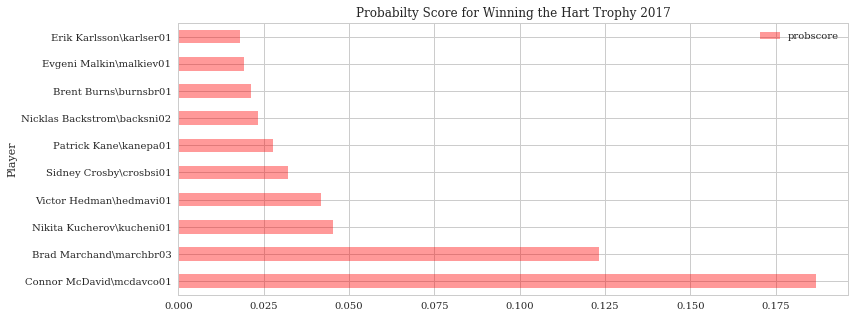

In [43]:
mvps17hist2.plot(kind='barh', color='Red', alpha=0.4,
              title='Probabilty Score for Winning the Hart Trophy 2017')
plt.savefig('probscore2018.png', dpi=300, bbox_inches='tight')

Area under the curve (AUC):
 0.999303944316


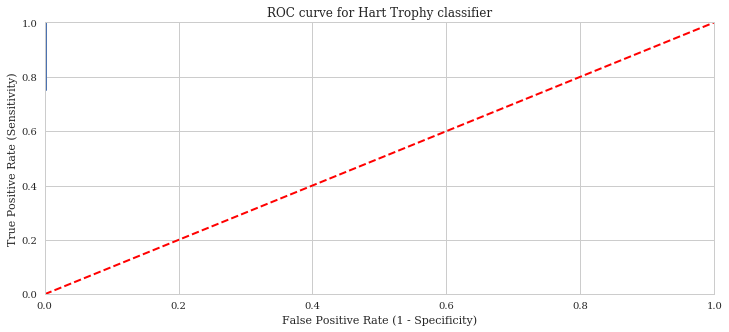

In [44]:
fpr, tpr, thresholds = roc_curve(ctest.HART, ypredprob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC curve for Hart Trophy classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area under the curve (AUC):\n", roc_auc_score(ctest.HART, ypredprob))
#higher AUC indicates better classifier